In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
import lightgbm as  lgb
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
seed = 4432

In [7]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print('Number of rows and columns in train dataset:', train.shape)
print('Number of rows and columns in test dataset:', test.shape)

Number of rows and columns in train dataset: (1460, 81)
Number of rows and columns in test dataset: (1459, 80)


In [9]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [10]:
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [11]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

## 1.3 Missing value

In [12]:
import matplotlib.pyplot as plt

Missing value in 19 columns and no missing value in 62 columns


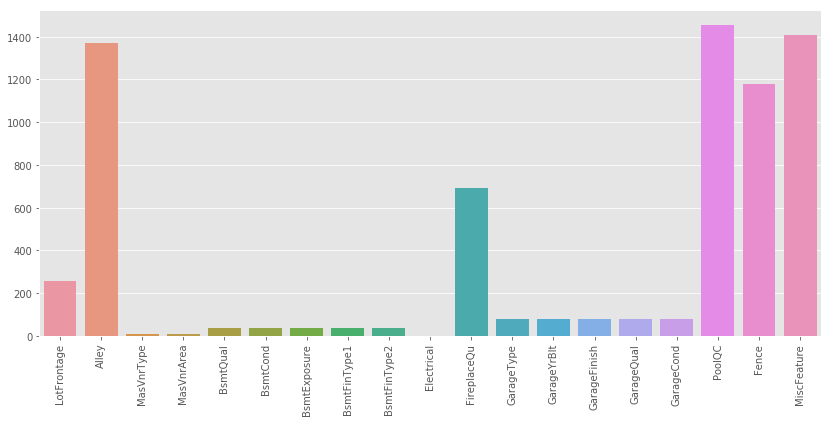

In [14]:
no_missing_col = [c for c in train.columns if train[c].isnull().sum() ==0]
missing_col = [c for c in train.columns if train[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = train[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

Missing value in 33 columns and no missing value in 47 columns


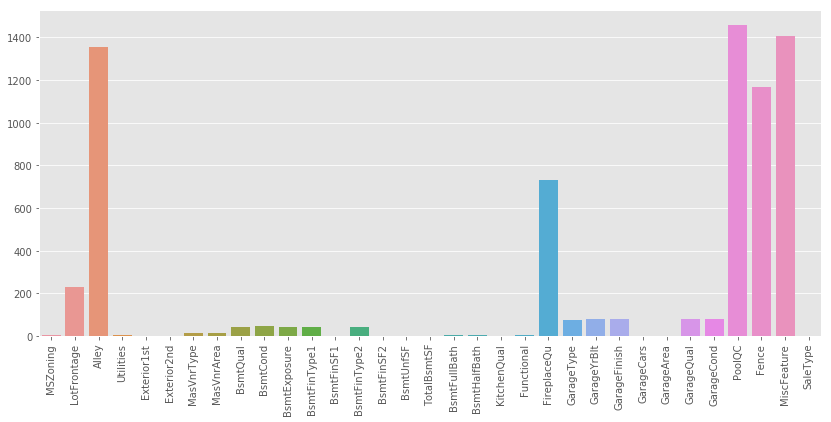

In [15]:
no_missing_col = [c for c in test.columns if test[c].isnull().sum() ==0]
missing_col = [c for c in test.columns if test[c].isnull().sum() >0]
print(f'Missing value in {len(missing_col)} columns and no missing value in {len(no_missing_col)} columns')

missing = test[missing_col].isnull().sum()
plt.figure(figsize=(14,6))
sns.barplot(x = missing.index, y = missing.values)
plt.xticks(rotation=90);

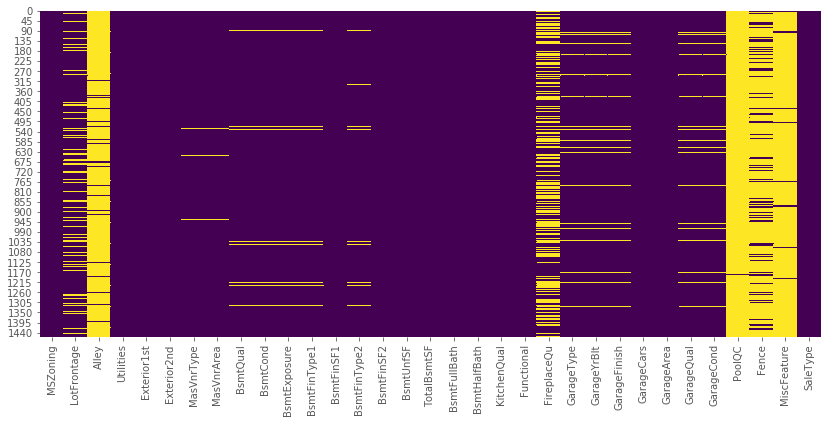

In [16]:
missing = train[missing_col].isnull()
plt.figure(figsize =(14,6))
sns.heatmap(missing, cbar=False, cmap='viridis')

## 1.4 Useful function

In [17]:
def Numeric_plot(df,column = '', title='',ncols=2,trans_func = None):
    """ Histogram plot Box plot of Numeric variable"""
    
    # Box plot
    trace1 = go.Box(y = df[column],name='Box')
    
    # Histogram
    trace2 = go.Histogram(x = df[column], name = 'x')
    
    fig = tools.make_subplots(rows=1, cols=ncols)
    fig.append_trace(trace1, 1,1)
    fig.append_trace(trace2, 1,2)
    fig['layout'].update(height=300, title=title)
    fig['layout']['yaxis1'].update(title= column)

    # Histogram after transformation
    if trans_func != None:
        tmp = df[column].apply(trans_func)
        trace3 = go.Histogram(x = tmp, name = trans_func+'(x)')
        fig.append_trace(trace3, 1,3)
    
    py.iplot(fig)

In [18]:
def Categorical_plot(df, column ='', title = '',limit=10):
    """ Barplot: of categorical variable
        Boxplot: of categoriucal and taraget variable"""
    # Barplot
    bar = df[column].value_counts()[:limit]/df.shape[0]
    bar_round = [round(w,2) for w in bar.values *100]
    trace1 = go.Bar(x = bar.index, y = bar_round, name='% Count' )    
    # Boxplot
    box = df[column].isin(bar.index[:limit])
    box =df.loc[box][[column,'SalePrice']]
    trace2 = go.Box(x = box[column], y= box['SalePrice'],name='Sale Price')

    # Figure legend
    fig = tools.make_subplots(rows=1, cols=2,)#subplot_titles= ('',''))
    fig.append_trace(trace1, 1,1)
    fig.append_trace(trace2, 1,2)
    
    fig['layout']['yaxis1'].update(title='% Count')
    fig['layout']['yaxis2'].update(title='Sale Price')
    fig['layout'].update(height=400, title=title,showlegend=False)
    py.iplot(fig)

In [19]:
def Regression_plot(df,column=''):
    """Regression plot: with pearsonr correlation value """
    cor = round(df[['SalePrice',column]].corr().iloc[0,1], 3)
    sns.jointplot(x= df[column], y = df['SalePrice'], kind= 'reg',
                  label = 'r: '+str(cor),color='blue')
    plt.legend()
    #plt.title('Regression plot ')

In [20]:
drop_col = []
categorical_col = []
numeric_col = []

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



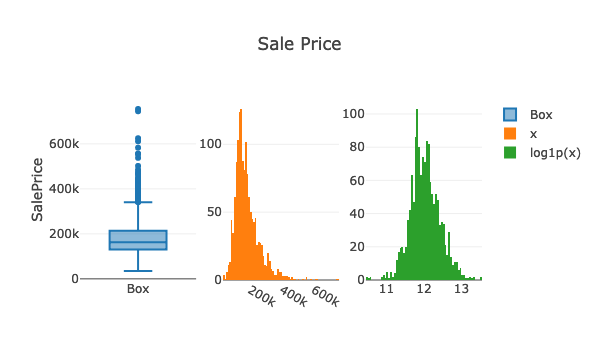

In [21]:
Numeric_plot(train, column='SalePrice',title='Sale Price',ncols=3,trans_func='log1p')

In [22]:
# Run this only once
map_value = {20: '1-STORY 1946 & NEWER ALL STYLES',
            30: '1-STORY 1945 & OLDER',
            40: '1-STORY W/FINISHED ATTIC ALL AGES',
            45: '1-1/2 STORY - UNFINISHED ALL AGES',
            50: '1-1/2 STORY FINISHED ALL AGES',
            60: '2-STORY 1946 & NEWER',
            70: '2-STORY 1945 & OLDER',
            75: '2-1/2 STORY ALL AGES',
            80: 'PLIT OR MULTI-LEVEL',
            85: 'SPLIT FOYER',
            90: 'DUPLEX - ALL STYLES AND AGES',
            120: '1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
            150: '1-1/2 STORY PUD - ALL AGES',
            160: '2-STORY PUD - 1946 & NEWER',
            180: 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
            190: '2 FAMILY CONVERSION - ALL STYLES AND AGES'}

train['MSSubClass'] = train['MSSubClass'].map(map_value)
test['MSSubClass'] = test['MSSubClass'].map(map_value)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



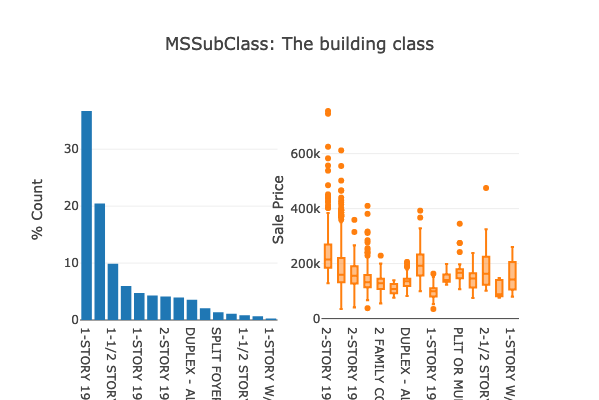

In [23]:
Categorical_plot(train, column='MSSubClass', title='MSSubClass: The building class',limit=None)

In [159]:
# Add to list of categorical column
categorical_col.append('MSSubClass')

In [25]:
map_value = { 
            'A': 'Agriculture',
            'C': 'Commercial',
            'FV': 'Floating Village Residential',
            'I': 'Industrial',
            'RH': 'Residential High Density',
            'RL': 'Residential Low Density',
            'RP': 'Residential Low Density Park',
            'RM': 'Residential Medium Density',
            }
train['MSZoning'] = train['MSZoning'].map(map_value)
test['MSZoning'] = test['MSZoning'].map(map_value)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



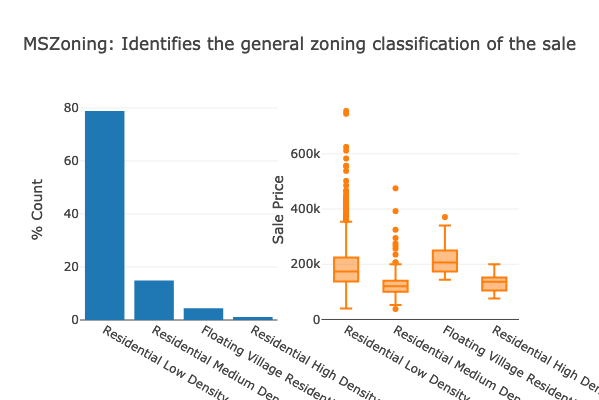

In [26]:
Categorical_plot(train, column= 'MSZoning', title ='MSZoning: Identifies the general zoning classification of the sale')

In [27]:
# Add to list of categorical column
categorical_col.append('MSZoning')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



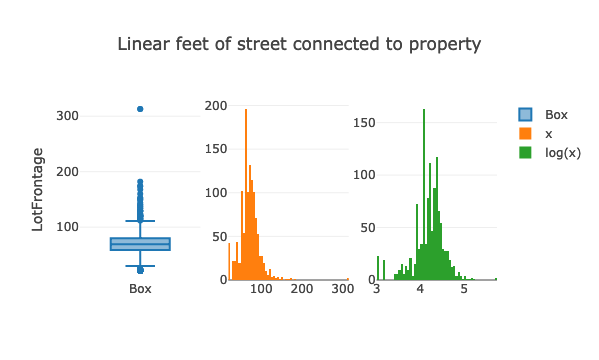

In [28]:
Numeric_plot(train, column= 'LotFrontage', ncols=3, trans_func='log', title='Linear feet of street connected to property')

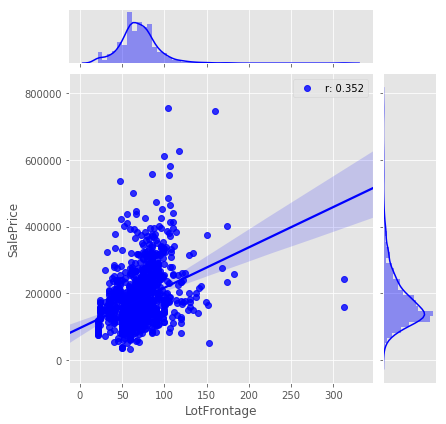

In [29]:
Regression_plot(train, column='LotFrontage')

In [30]:
# Add to list of Numeric column list
numeric_col.append('LotFrontage')

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]  [ (1,3) x3,y3 ]



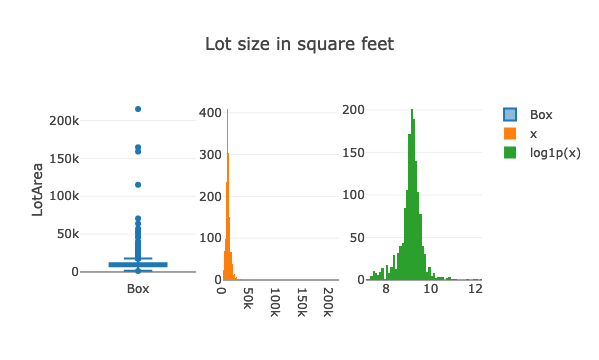

In [31]:
Numeric_plot(train, column = 'LotArea',ncols=3, trans_func='log1p', title='Lot size in square feet')

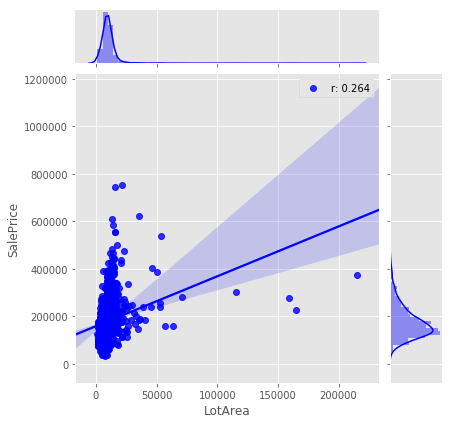

In [32]:
Regression_plot(train, column='LotArea')

In [33]:
# Add to list of Numeric column list
numeric_col.append('LotArea')

## 2.5 Street: Type of road access to property¶

- Grvl: Gravel
- Pave: Paved

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



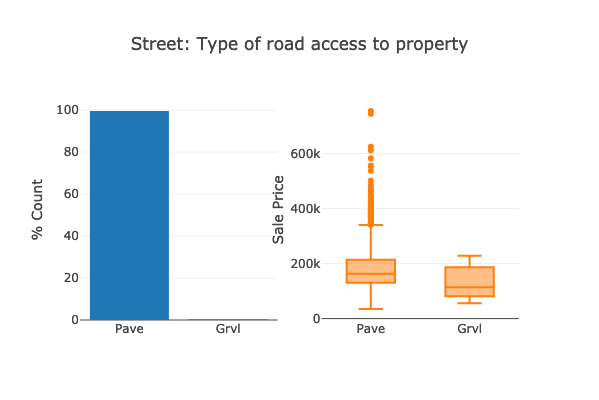

In [34]:
Categorical_plot(train, column='Street', title= 'Street: Type of road access to property')

In [35]:
# Add to list of Drop column list
drop_col.append('Street')

## 2.6 Alley: Type of alley access to property

- Grvl: Gravel
- Pave: Paved
- NA: No alley access

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



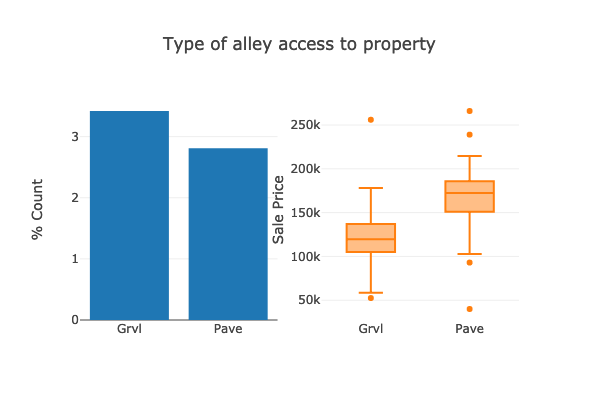

In [36]:
Categorical_plot(train, column='Alley', title= 'Type of alley access to property')

In [37]:
# Add to list of categorical column list
drop_col.append('Alley')

## 2.7 LotShape: General shape of property
- Reg: Regular
- IR1: Slightly irregular
- IR2: Moderately Irregular
- IR3: Irregular

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



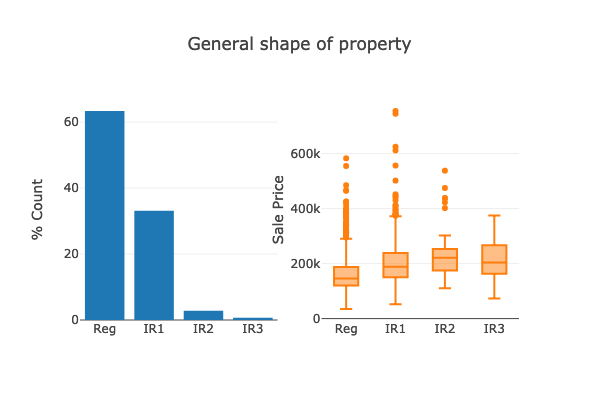

In [38]:
Categorical_plot(train, column='LotShape', title= 'General shape of property')

In [39]:
# Add to list of categorical column list
categorical_col.append('LotShape')

## 2.8 LandContour: Flatness of the property
- Lvl: Near Flat/Level
- Bnk: Banked - Quick and significant rise from street grade to building
- HLS: Hillside - Significant slope from side to side
- Low: Depression

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



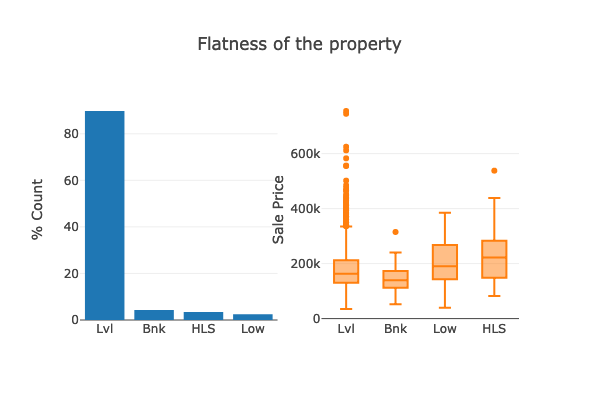

In [40]:
Categorical_plot(train, column='LandContour', title= 'Flatness of the property')

In [41]:
# Add to list of categorical column list
categorical_col.append('LandContour')

## 2.9 Utilities: Type of utilities available

```
AllPub   All public Utilities (E,G,W,& S)    
NoSewr   Electricity, Gas, and Water (Septic Tank)
NoSeWa   Electricity and Gas Only
ELO  Electricity only    
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



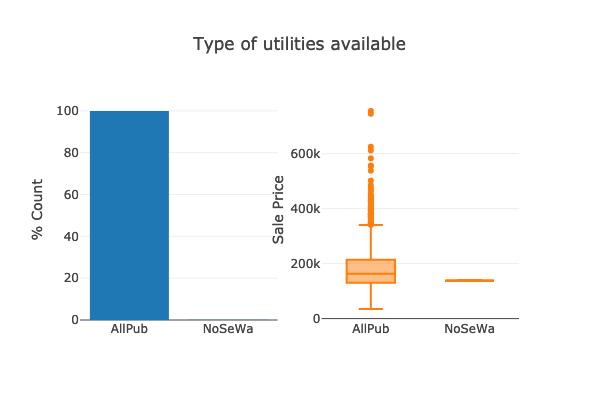

In [42]:
Categorical_plot(train, column='Utilities', title= 'Type of utilities available')

In [43]:
# Add to list of Drop column list
drop_col.append('Utilities')

## 2.10 LotConfig: Lot configuration
```
   Inside   Inside lot
   Corner   Corner lot
   CulDSac  Cul-de-sac
   FR2  Frontage on 2 sides of property
   FR3  Frontage on 3 sides of property
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



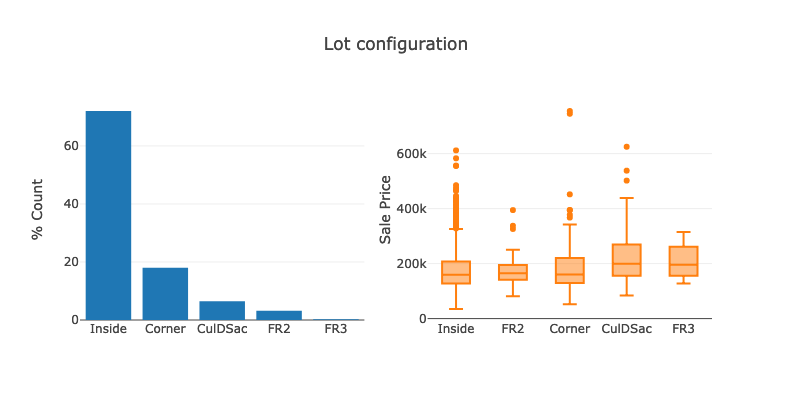

In [44]:
Categorical_plot(train, column='LotConfig', title= 'Lot configuration')

In [45]:
# Add to list of categorical column list
categorical_col.append('LotConfig')

## 2.11 LandSlope: Slope of property
- Gtl  Gentle slope
-    Mod  Moderate Slope  
-    Sev  Severe Slope

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



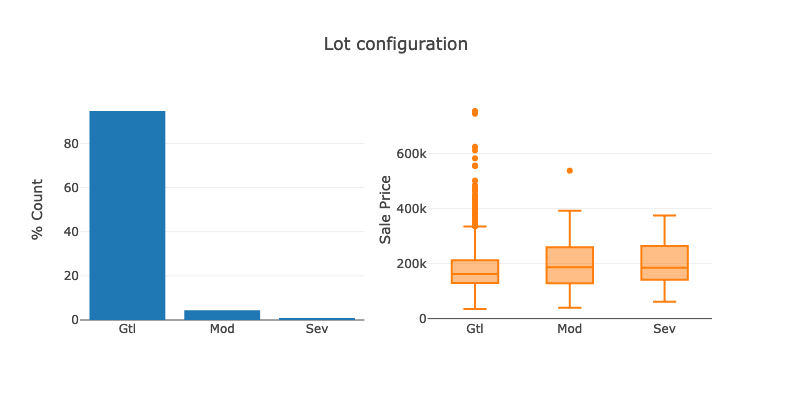

In [46]:
Categorical_plot(train, column='LandSlope', title= 'Lot configuration')

In [47]:
# Add to list of categorical column list
categorical_col.append('LandSlope')

## 2.12 Neighborhood: Physical locations within Ames city limits
```
   Blmngtn  Bloomington Heights
   Blueste  Bluestem
   BrDale   Briardale
   BrkSide  Brookside
   ClearCr  Clear Creek
   CollgCr  College Creek
   Crawfor  Crawford
   Edwards  Edwards
   Gilbert  Gilbert
   IDOTRR   Iowa DOT and Rail Road
   MeadowV  Meadow Village
   Mitchel  Mitchell
   Names    North Ames
   NoRidge  Northridge
   NPkVill  Northpark Villa
   NridgHt  Northridge Heights
   NWAmes   Northwest Ames
   OldTown  Old Town
   SWISU    South & West of Iowa State University
   Sawyer   Sawyer
   SawyerW  Sawyer West
   Somerst  Somerset
   StoneBr  Stone Brook
   Timber   Timberland
   Veenker  Veenker
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



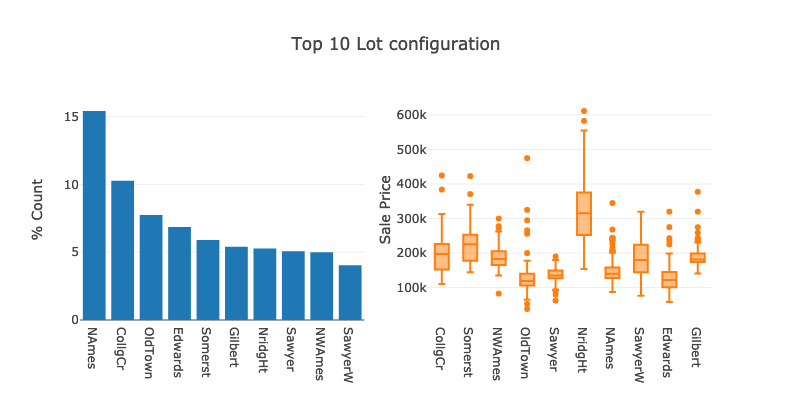

In [48]:
Categorical_plot(train, column='Neighborhood', title= 'Top 10 Lot configuration',limit=10)

In [49]:
# Add to list of categorical column list
categorical_col.append('Neighborhood')

## 2.13 Condition1: Proximity to various conditions
```
   Artery   Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm Normal  
   RRNn Within 200' of North-South Railroad
   RRAn Adjacent to North-South Railroad
   PosN Near positive off-site feature--park, greenbelt, etc.
   PosA Adjacent to postive off-site feature
   RRNe Within 200' of East-West Railroad
   RRAe Adjacent to East-West Railroad
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



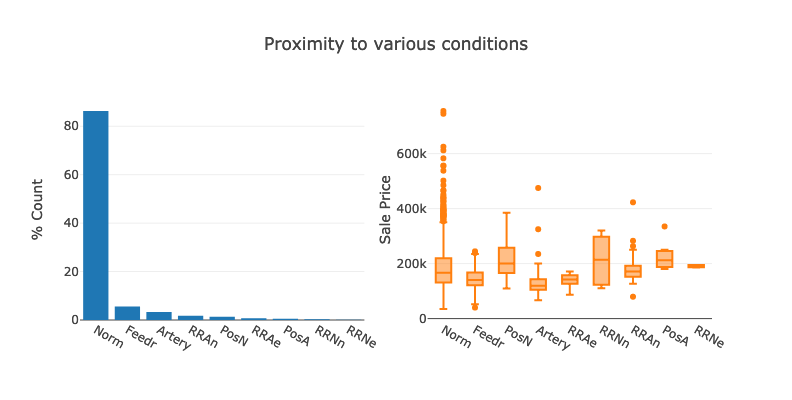

In [50]:
Categorical_plot(train, column='Condition1', title= 'Proximity to various conditions',limit=None)

In [51]:
# Add to list of categorical column list
categorical_col.append('Condition1')

## 2.14 Condition2: Proximity to various conditions (if more than one is present)
```
   Artery   Adjacent to arterial street
   Feedr    Adjacent to feeder street   
   Norm Normal  
   RRNn Within 200' of North-South Railroad
   RRAn Adjacent to North-South Railroad
   PosN Near positive off-site feature--park, greenbelt, etc.
   PosA Adjacent to postive off-site feature
   RRNe Within 200' of East-West Railroad
   RRAe Adjacent to East-West Railroad
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



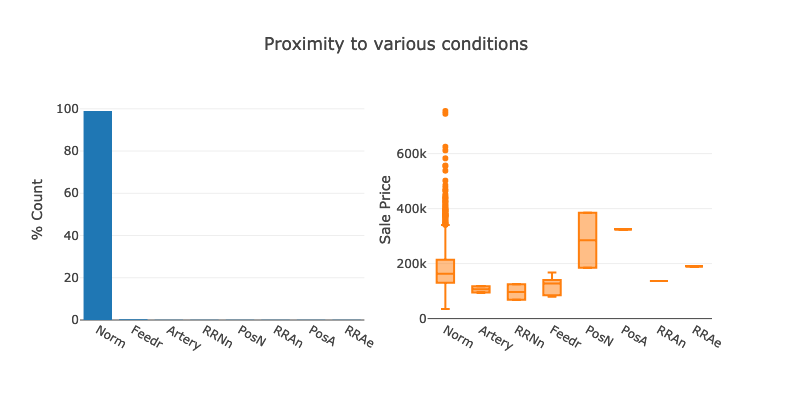

In [52]:
Categorical_plot(train, column='Condition2', title= 'Proximity to various conditions',limit=None)

In [53]:
# Add to list of categorical column list
categorical_col.append('Condition2')

## 2.15 BldgType: Type of dwelling
```
   1Fam Single-family Detached  
   2FmCon   Two-family Conversion; originally built as one-family dwelling
   Duplx    Duplex
   TwnhsE   Townhouse End Unit
   TwnhsI   Townhouse Inside Unit
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



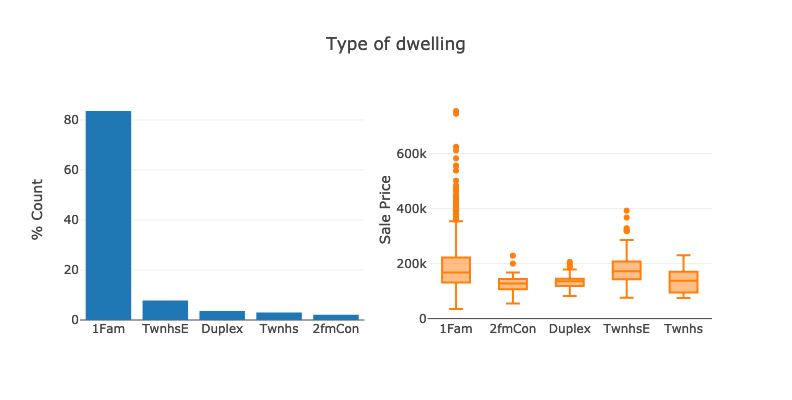

In [54]:
Categorical_plot(train, column='BldgType', title= 'Type of dwelling',limit=None)

In [55]:
# Add to list of categorical column list
categorical_col.append('BldgType')

## 2.16 HouseStyle: Style of dwelling
```
   1Story   One story
   1.5Fin   One and one-half story: 2nd level finished
   1.5Unf   One and one-half story: 2nd level unfinished
   2Story   Two story
   2.5Fin   Two and one-half story: 2nd level finished
   2.5Unf   Two and one-half story: 2nd level unfinished
   SFoyer   Split Foyer
   SLvl Split Level
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



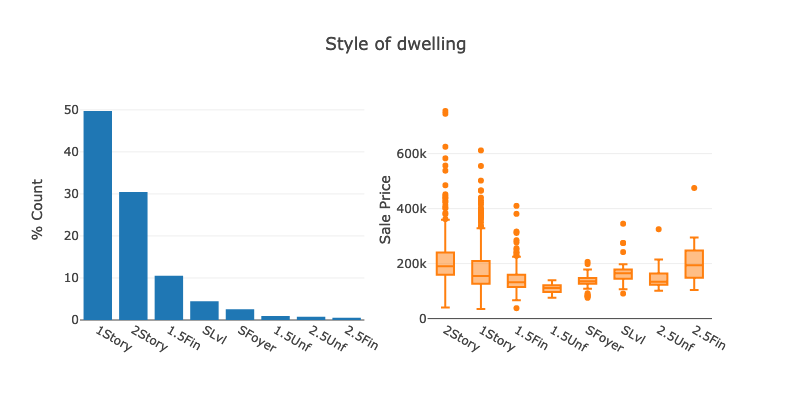

In [57]:
Categorical_plot(train, column='HouseStyle', title= 'Style of dwelling',limit=None)

In [58]:
# Add to list of categorical column list
categorical_col.append('HouseStyle')

## 2.17 OverallQual: Rates the overall material and finish of the house¶

```
10: Very Excellent 
9: Excellent 
8: Very Good 
7: Good 
6: Above Average 
5: Average 
4: Below Average 
3: Fair 
2: Poor 
1: Very Poor
```

In [59]:
map_values = {10: 'Very Excellent', 
             9: 'Excellent', 
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'
            }
train['OverallQual'] = train['OverallQual'].map(map_values)
test['OverallQual'] = test['OverallQual'].map(map_values)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



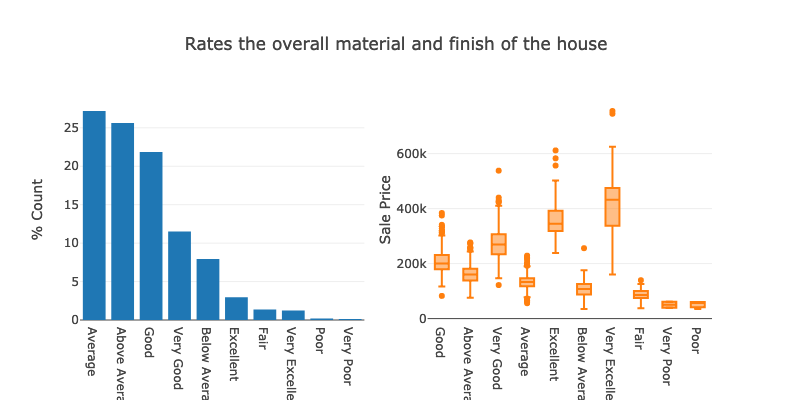

In [60]:
Categorical_plot(train, column='OverallQual', title= 'Rates the overall material and finish of the house',limit=None)

In [61]:
# Add to list of categorical column list
categorical_col.append('OverallQual')

## 2.18 OverallCond: Rates the overall condition of the house¶

10: Very Excellent 9: Excellent 8: Very Good 7: Good 6: Above Average 5: Average 4: Below Average 3: Fair 2: Poor 1: Very Poor

In [62]:
map_values = {10: 'Very Excellent', 
             9: 'Excellent', 
             8: 'Very Good',
             7: 'Good',
             6: 'Above Average',
             5: 'Average',
             4: 'Below Average',
             3: 'Fair',
             2: 'Poor',
             1: 'Very Poor'
            }
train['OverallCond'] = train['OverallCond'].map(map_values)
test['OverallCond'] = test['OverallCond'].map(map_values)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



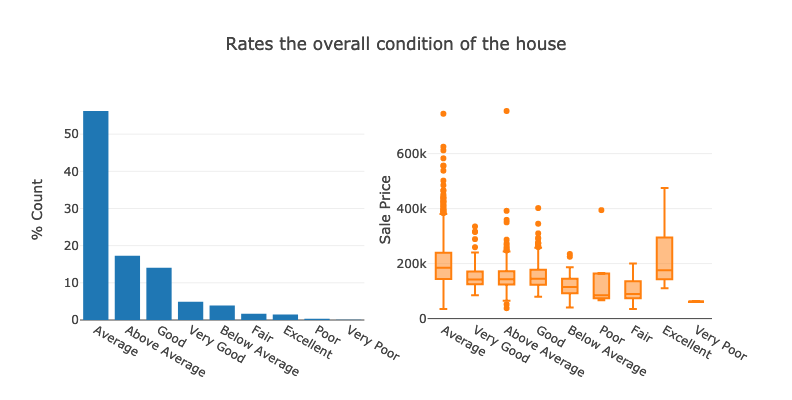

In [63]:
Categorical_plot(train, column='OverallCond', title= 'Rates the overall condition of the house',limit=None)

In [64]:
# Add to list of categorical column list
categorical_col.append('OverallCond')

## 2.19 YearBuilt: Original construction date

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



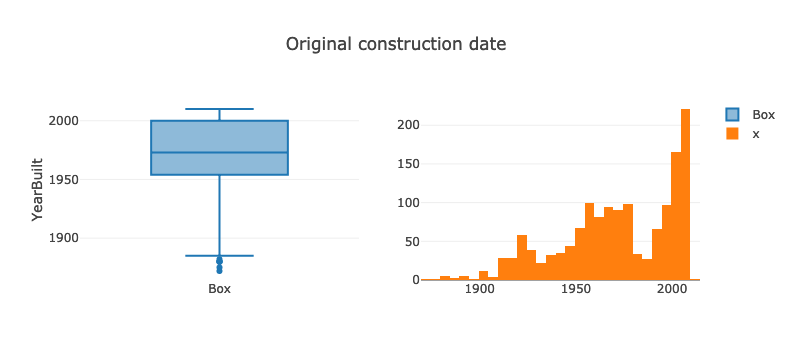

In [65]:
Numeric_plot(train, column='YearBuilt', title= 'Original construction date', ncols=2,)# trans_func='sqrt')

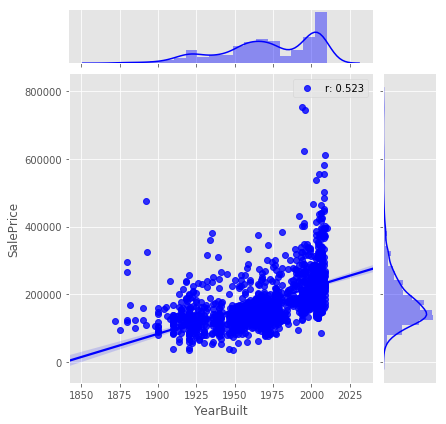

In [66]:
Regression_plot(train, column='YearBuilt')

In [67]:
# Add to numeric column list
numeric_col.append('YearBuilt')

## 2.20 YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



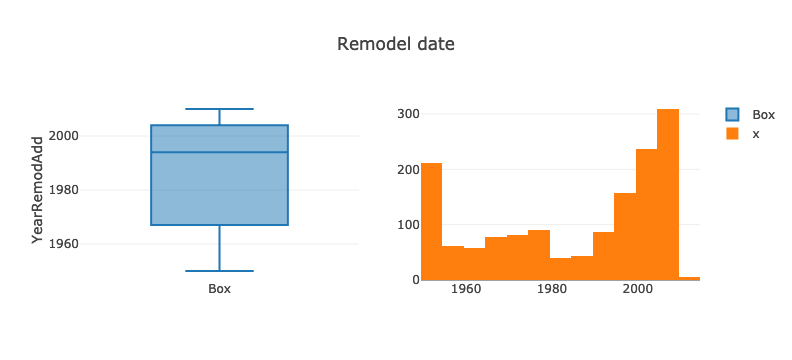

In [68]:
Numeric_plot(train, column='YearRemodAdd', title= 'Remodel date', ncols=2,)# trans_func='log')

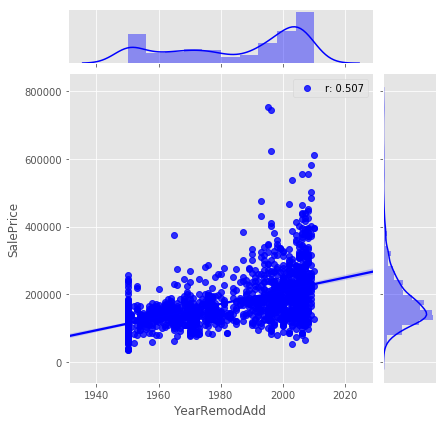

In [69]:
Regression_plot(train, column='YearRemodAdd')

In [70]:
# Add to numeric column list
numeric_col.append('YearRemodAdd')

## 2.21 RoofStyle: Type of roof

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



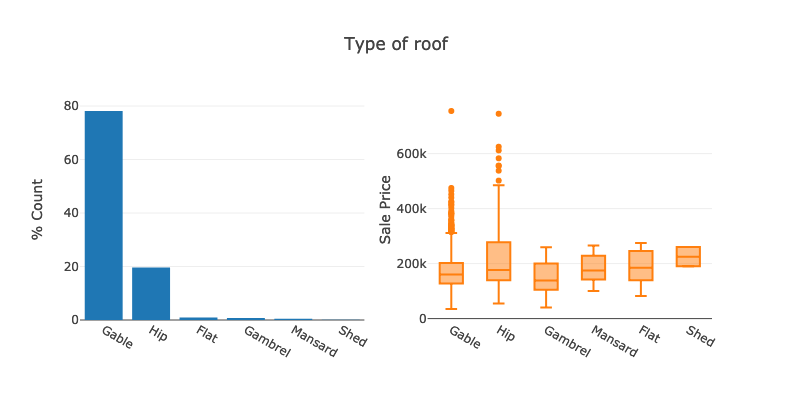

In [71]:
Categorical_plot(train, column='RoofStyle', title= 'Type of roof',limit=None)

In [72]:
# Add to list of categorical column list
categorical_col.append('RoofStyle')

## 2.22 RoofMatl: Roof material
```
ClyTile Clay or Tile
CompShg Standard (Composite) Shingle
Membran Membrane
Metal   Metal
Roll    Roll
Tar&Grv Gravel & Tar
WdShake Wood Shakes
WdShngl Wood Shingles
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



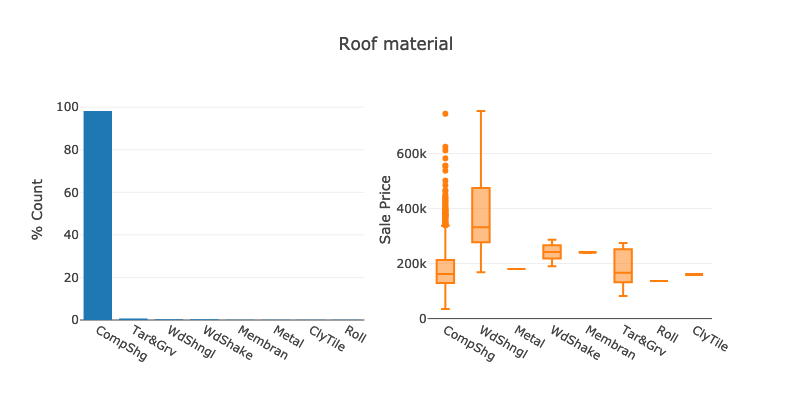

In [73]:
Categorical_plot(train, column='RoofMatl', title= 'Roof material',limit=None)

In [74]:
# Add to list of drop column list
drop_col.append('RoofMatl')

## 2.23 Exterior1st: Exterior covering on house
```
   AsbShng  Asbestos Shingles
   AsphShn  Asphalt Shingles
   BrkComm  Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   CemntBd  Cement Board
   HdBoard  Hard Board
   ImStucc  Imitation Stucco
   MetalSd  Metal Siding
   Other    Other
   Plywood  Plywood
   PreCast  PreCast 
   Stone    Stone
   Stucco   Stucco
   VinylSd  Vinyl Siding
   Wd Sdng  Wood Siding
   WdShing  Wood Shingles
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



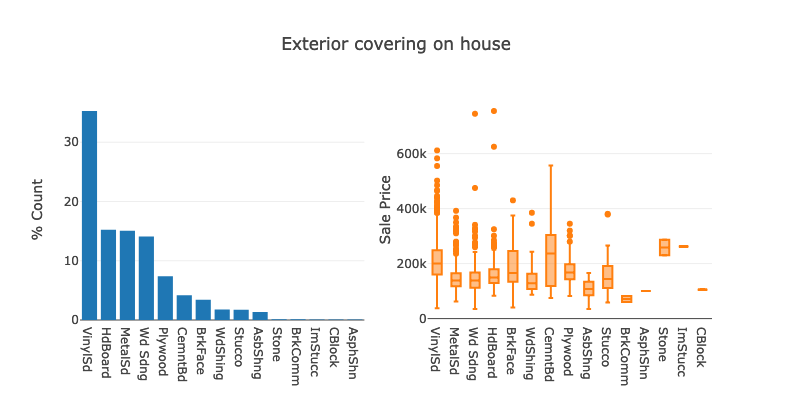

In [75]:
Categorical_plot(train, column='Exterior1st', title= 'Exterior covering on house',limit=None)

In [76]:
# Add to list of categorical column list
categorical_col.append('Exterior1st')

## 2.24 Exterior2nd: Exterior covering on house (if more than one material)
```
   AsbShng  Asbestos Shingles
   AsphShn  Asphalt Shingles
   BrkComm  Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   CemntBd  Cement Board
   HdBoard  Hard Board
   ImStucc  Imitation Stucco
   MetalSd  Metal Siding
   Other    Other
   Plywood  Plywood
   PreCast  PreCast
   Stone    Stone
   Stucco   Stucco
   VinylSd  Vinyl Siding
   Wd Sdng  Wood Siding
   WdShing  Wood Shingles
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



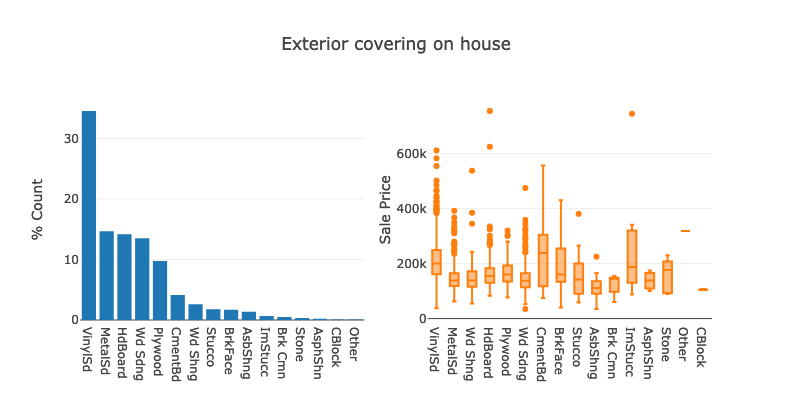

In [77]:
Categorical_plot(train, column='Exterior2nd', title= 'Exterior covering on house',limit=None)

In [78]:
# Add to list of categorical column list
categorical_col.append('Exterior2nd')

## 2.25 MasVnrType: Masonry veneer type
```
   BrkCmn   Brick Common
   BrkFace  Brick Face
   CBlock   Cinder Block
   None None
   Stone    Stone
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



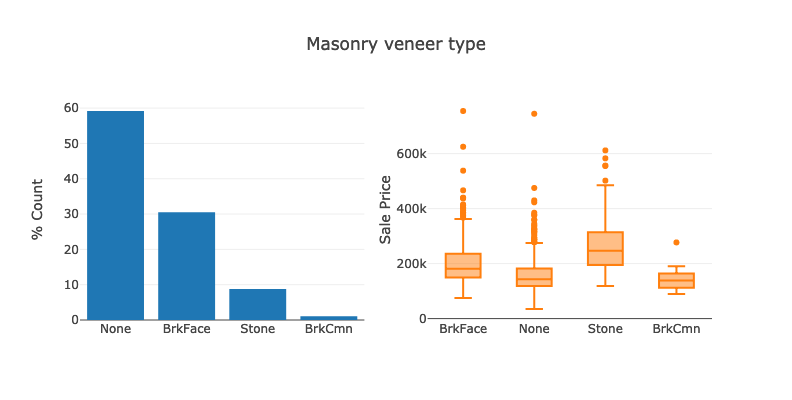

In [79]:
Categorical_plot(train, column='MasVnrType', title= 'Masonry veneer type',limit=None)

In [80]:
# Add to list of categorical column list
categorical_col.append('MasVnrType')

## 2.26 MasVnrArea: Masonry veneer area in square feet

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



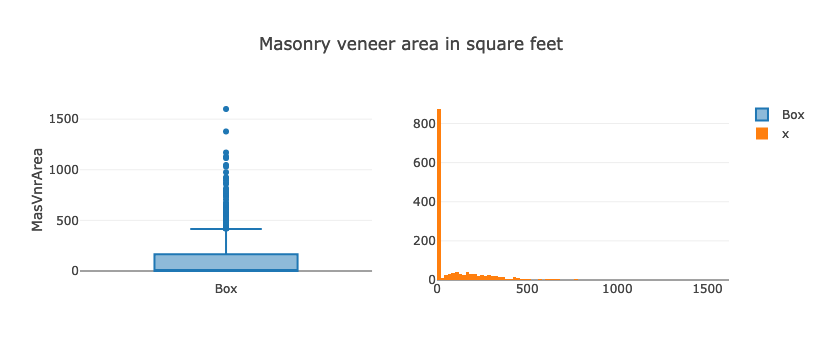

In [83]:
Numeric_plot(train, column= 'MasVnrArea', title= 'Masonry veneer area in square feet',) #ncols=3, trans_func='sqrt')

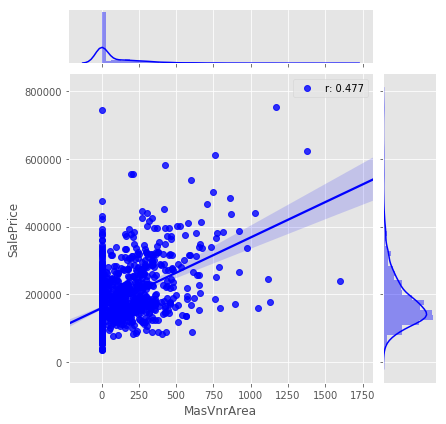

In [84]:
Regression_plot(train, column='MasVnrArea')

In [85]:
# Add to list of numeric column list
numeric_col.append('MasVnrArea')

## 2.27 ExterQual: Evaluates the quality of the material on the exterior
```
Ex: Excellent
Gd: Good
TA: Average/Typical
Fa: Fair
Po: Poor
```

In [86]:
map_values = { 
            'Ex': 'Excellent',
            'Gd': 'Good',
            'TA': 'Average/Typical',
            'Fa': 'Fair',
            'Po': 'Poor'
            }
train['ExterQual'] = train['ExterQual'].map(map_values)
test['ExterQual'] = test['ExterQual'].map(map_values)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



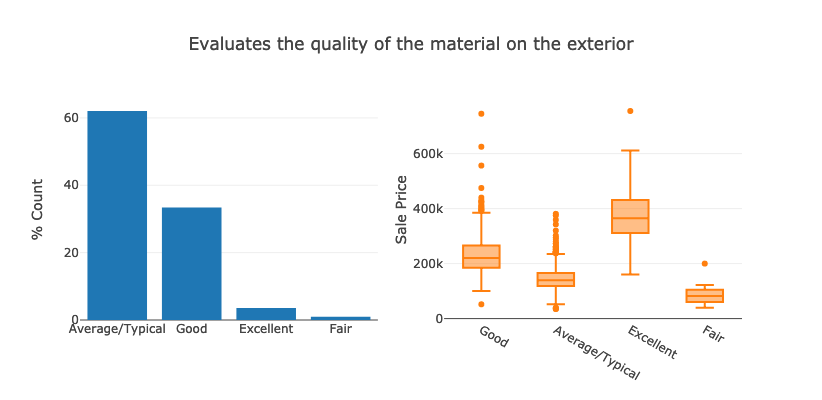

In [87]:
Categorical_plot(train, column='ExterQual', title= 'Evaluates the quality of the material on the exterior',limit=None)

In [88]:
# Add to list of categorical column list
categorical_col.append('ExterQual')

## 2.30 ExterCond: Evaluates the present condition of the material on the exterior

```
Ex: Excellent
Gd: Good
TA: Average/Typical
Fa: Fair
Po: Poor
```

In [89]:
map_values = { 
            'Ex': 'Excellent',
            'Gd': 'Good',
            'TA': 'Average/Typical',
            'Fa': 'Fair',
            'Po': 'Poor'
            }
train['ExterCond'] = train['ExterCond'].map(map_values)
test['ExterCond'] = test['ExterCond'].map(map_values)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



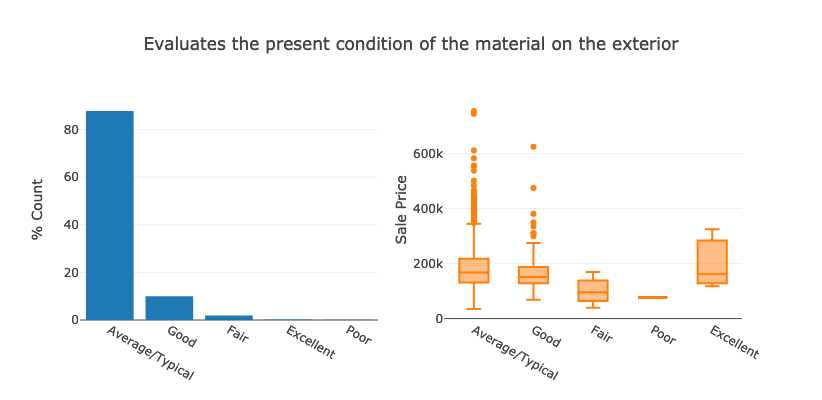

In [90]:
Categorical_plot(train, column='ExterCond', title= 'Evaluates the present condition of the material on the exterior',limit=None)

In [91]:
# Add to list of categorical column list
categorical_col.append('ExterCond')

## 2.31 Foundation: Type of foundation
```
   BrkTil   Brick & Tile
   CBlock   Cinder Block
   PConc    Poured Contrete 
   Slab Slab
   Stone    Stone
   Wood Wood
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



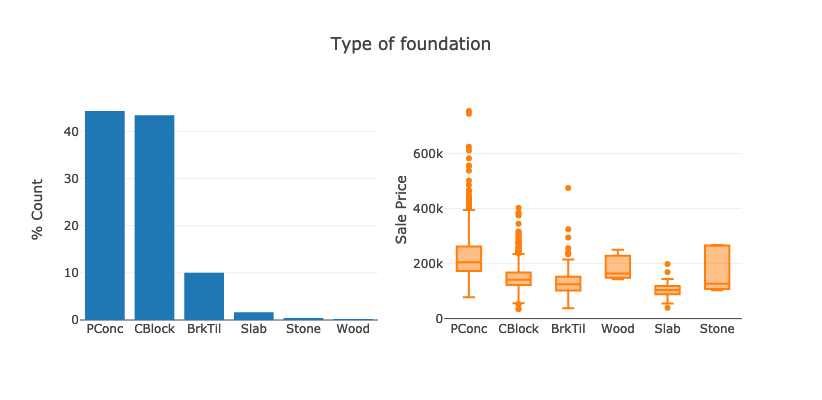

In [92]:
Categorical_plot(train, column='Foundation', title= 'Type of foundation',limit=None)

In [93]:
# Add to list of categorical column list
categorical_col.append('Foundation')

## 2.32 BsmtQual: Evaluates the height of the basement

```
Ex: Excellent (100+ inches)
Gd: Good (90-99 inches)
TA: Typical (80-89 inches)
Fa: Fair (70-79 inches)
Po: Poor (<70 inches
NA: No Basement
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



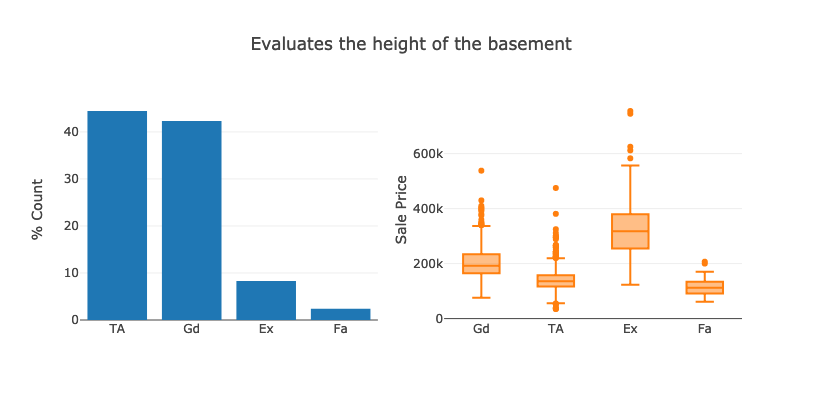

In [94]:
Categorical_plot(train, column='BsmtQual', title= 'Evaluates the height of the basement',limit=None)

In [95]:
# Add to list of categorical column list
categorical_col.append('BsmtQual')

## 2.33 BsmtCond: Evaluates the general condition of the basement
```
   Ex   Excellent
   Gd   Good
   TA   Typical - slight dampness allowed
   Fa   Fair - dampness or some cracking or settling
   Po   Poor - Severe cracking, settling, or wetness
   NA   No Basement
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



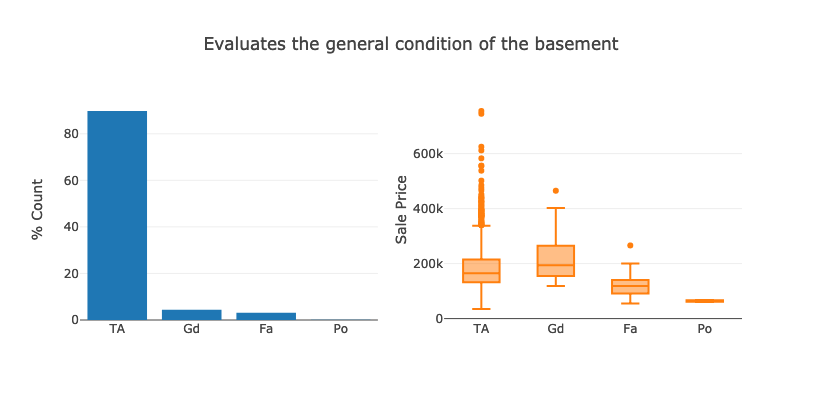

In [96]:
Categorical_plot(train, column='BsmtCond', title= 'Evaluates the general condition of the basement',limit=None)

In [97]:
# Add to list of categorical column list
categorical_col.append('BsmtCond')

## 2.34 BsmtExposure: Refers to walkout or garden level walls
```
   Gd   Good Exposure
   Av   Average Exposure (split levels or foyers typically score average or above)  
   Mn   Mimimum Exposure
   No   No Exposure
   NA   No Basement
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



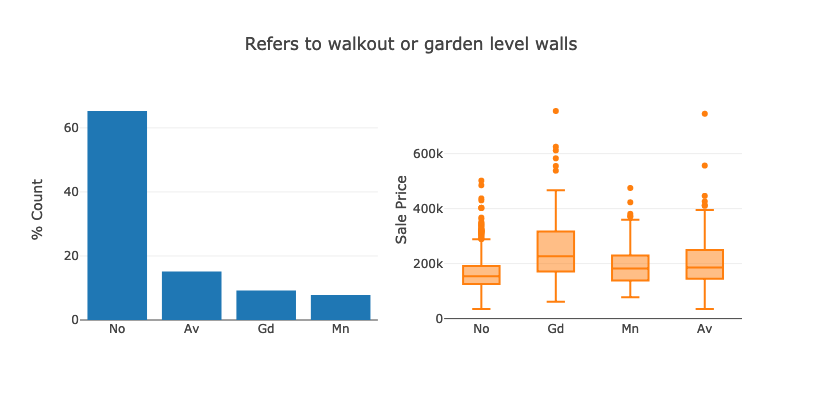

In [98]:
Categorical_plot(train, column='BsmtExposure', title= 'Refers to walkout or garden level walls',limit=None)

In [99]:
# Add to list of categorical column list
categorical_col.append('BsmtExposure')

## 2.35 BsmtFinType1: Rating of basement finished area

```
   GLQ  Good Living Quarters
   ALQ  Average Living Quarters
   BLQ  Below Average Living Quarters   
   Rec  Average Rec Room
   LwQ  Low Quality
   Unf  Unfinshed
   NA   No Basement
```

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



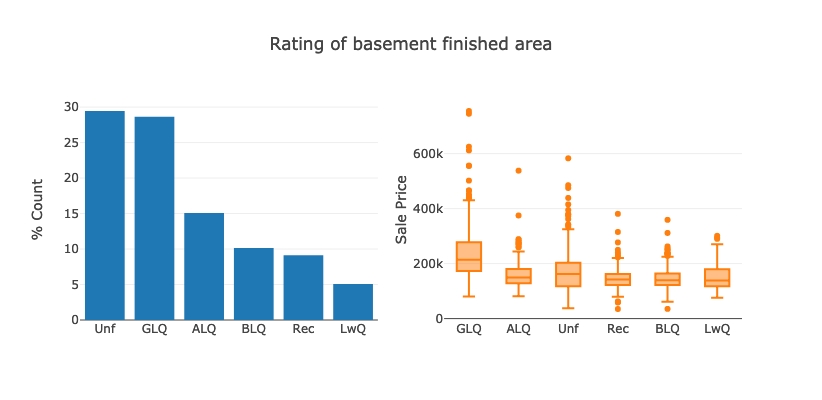

In [100]:
Categorical_plot(train, column='BsmtFinType1', title= 'Rating of basement finished area',limit=None)

In [101]:
# Add to list of categorical column list
categorical_col.append('BsmtFinType1')

## 2.36 BsmtFinSF1: Type 1 finished square feet

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



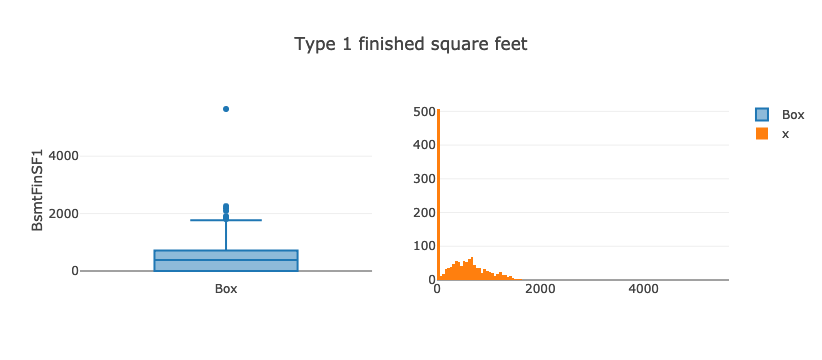

In [102]:
Numeric_plot(train, column='BsmtFinSF1', title='Type 1 finished square feet')#,ncols=3, trans_func='log1p')

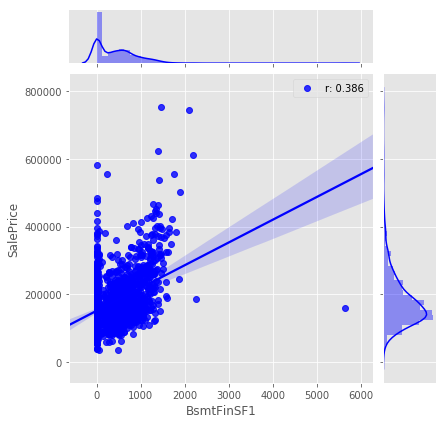

In [103]:
Regression_plot(train, column= 'BsmtFinSF1')

In [104]:
# Add to list of numeric column list
numeric_col.append('BsmtFinSF1')

In [105]:
# Add to list of categorical column list
categorical_col.append('BsmtFinType2')

In [106]:
# Add to list of numeric column list
numeric_col.append('BsmtFinSF2')

In [107]:
# Add to list of numeric column list
numeric_col.append('BsmtUnfSF')

In [108]:
# Add to list of numeric column list
numeric_col.append('TotalBsmtSF')

In [109]:
# Add to list of dro column list
drop_col.append('Heating')

In [110]:
# Add to list of categorical column list
categorical_col.append('HeatingQC')

In [111]:
categorical_col.append('CentralAir')

In [112]:
categorical_col.append('Electrical')

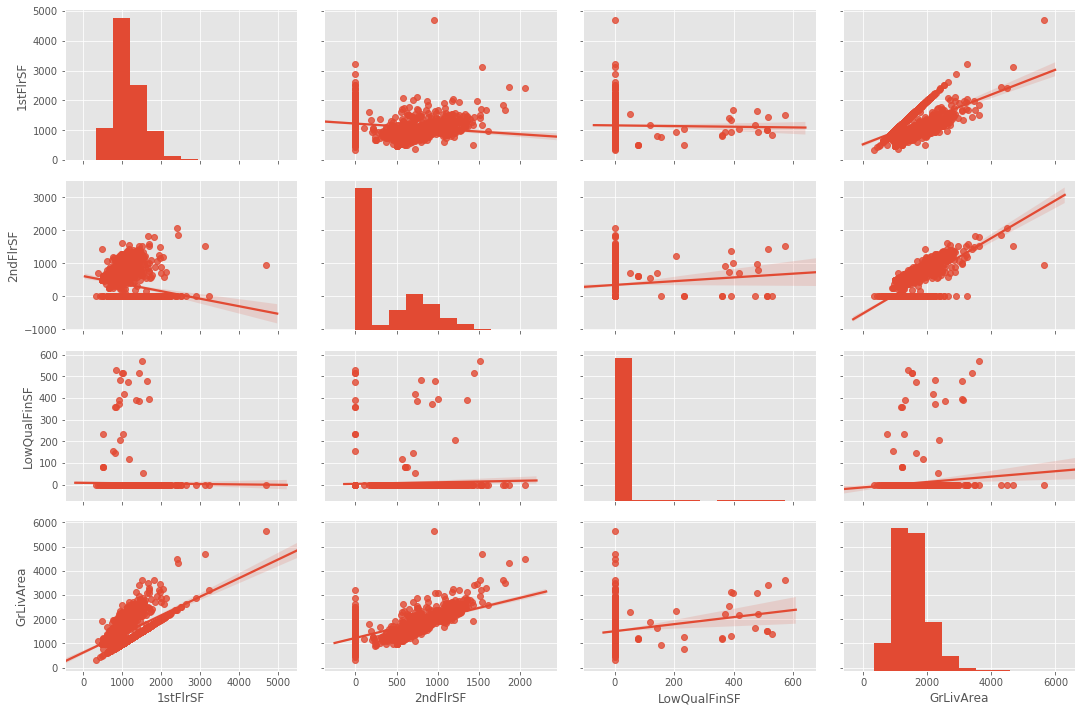

In [113]:
g = sns.pairplot(train, vars=['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'],
                palette = 'viridis', kind= 'reg', aspect=1.5)

In [115]:
# Add to
numeric_col.extend(['1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea'])

In [116]:
categorical_col.append('BsmtFullBath')

In [117]:
categorical_col.append('BsmtHalfBath')

In [118]:
categorical_col.append('FullBath')

In [119]:
categorical_col.append('HalfBath')

In [120]:
categorical_col.append('BedroomAbvGr')

In [121]:
categorical_col.append('KitchenAbvGr')

In [122]:
categorical_col.append('KitchenQual')

In [124]:
categorical_col.append('TotRmsAbvGrd')

In [125]:
categorical_col.append('Functional')

In [126]:
categorical_col.append('Fireplaces')

In [127]:
categorical_col.append('FireplaceQu')

In [128]:
categorical_col.append('GarageType')

In [129]:
numeric_col.append('GarageYrBlt')

In [130]:
categorical_col.append('GarageFinish')

In [131]:
categorical_col.append('GarageCars')

In [132]:
numeric_col.append('GarageArea')

In [133]:
categorical_col.append('GarageQual')

In [134]:
categorical_col.append('GarageCond')

In [135]:
categorical_col.append('PavedDrive')

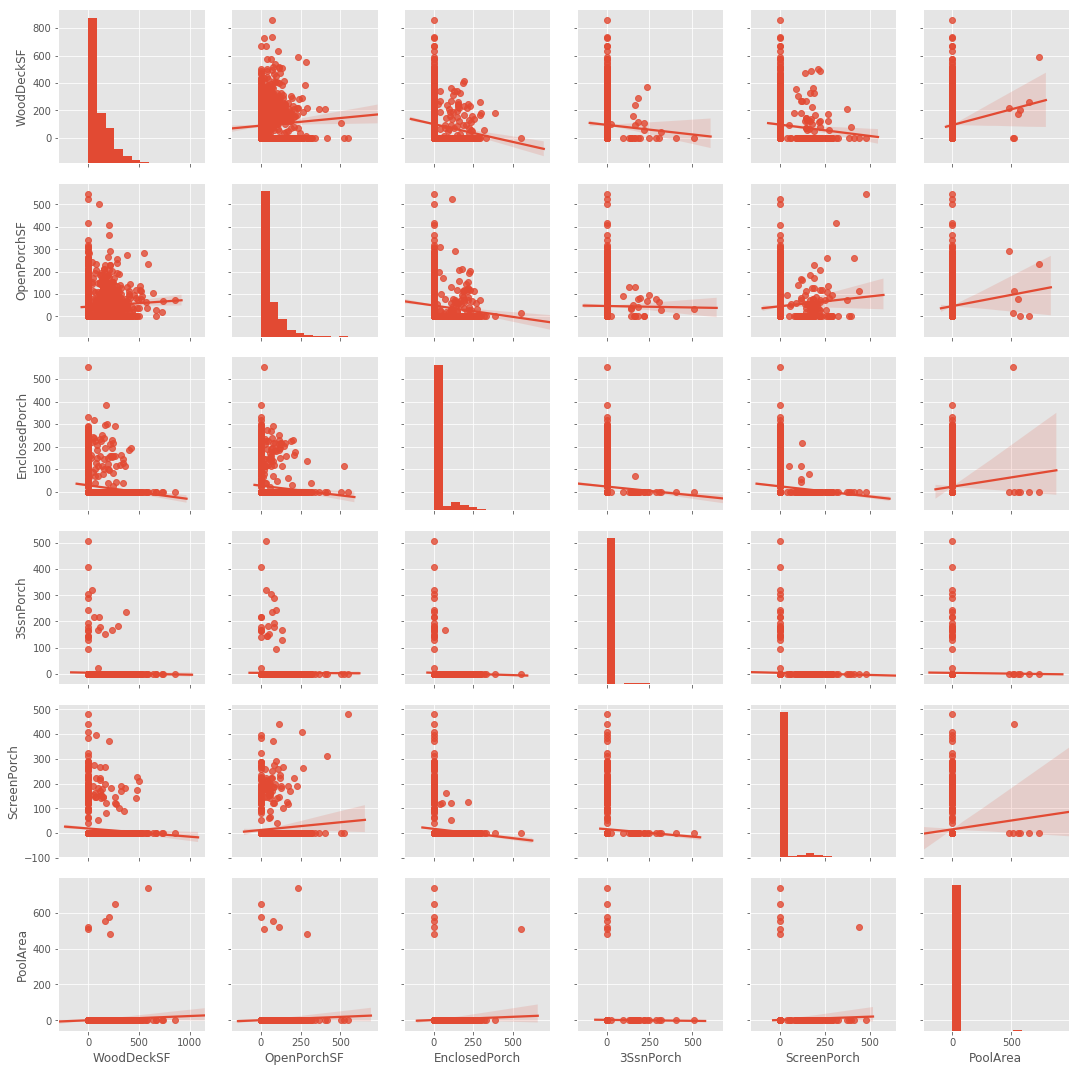

In [136]:
g = sns.pairplot(data= train, kind= 'reg',
                 vars= ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'],)

In [137]:
numeric_col.extend(['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea'])

In [138]:
drop_col.append('PoolQC')

In [139]:
categorical_col.append('Fence')

In [140]:
drop_col.append('MiscFeature')

In [141]:
numeric_col.append('MiscVal')

In [142]:
categorical_col.append('MoSold')

In [143]:
categorical_col.append('YrSold')

In [144]:
categorical_col.append('SaleType')

In [146]:
categorical_col.append('SaleCondition')

In [147]:
print('Check number of column',train.shape, len(categorical_col)+len(drop_col)+len(numeric_col))
train = train.drop(drop_col, axis=1)
test = test.drop(drop_col, axis=1)

Check number of column (1460, 81) 80


In [148]:
test['SalePrice'] = np.nan

In [149]:
train_test = pd.concat([train, test], axis =0)
train_test.shape

(2919, 74)

In [150]:
def Binary_encoding(df,columns):
    """Binary encoding"""
    print('*'*5,'Binary encoding','*'*5)
    lb = LabelBinarizer()
    print('Original shape:',df.shape)
    original_col = df.columns
    #columns = [i for i in columns if df[columns].nunique()>2]
    for i in columns:
        if df[i].nunique() >2:
            result = lb.fit_transform(df[i].fillna(df[i].mode()[0],axis=0))
            col = ['BIN_'+ str(i)+'_'+str(c) for c in lb.classes_]
            result1 = pd.DataFrame(result, columns=col)
            df = df.join(result1)
    print('After:',df.shape)
    #new_col = [c for c in df.columns if c not in original_col]
    return df

In [151]:
def OneHotEncoding(df, columns, nan_as_category=True, drop_first=True):
    """One Hot Encoding: of categorical variable"""
    print(10*'*'+'One Hot Encoding:',df.shape,10*'*')
    lenght = df.shape[0]
    # Concatenate dataframe
    #df = pd.concat([df1,df2], axis=0)
    
    # OHE
    df = pd.get_dummies(data = df, columns= columns, drop_first=drop_first, 
                        dummy_na=nan_as_category)
    
    print(10*'*','After One Hot Encoding:',df.shape,10*'*')
    return df

In [161]:
train_test = OneHotEncoding(train_test, columns=categorical_col)

**********One Hot Encoding: (2919, 162) **********
********** After One Hot Encoding: (2919, 460) **********


In [162]:
def Fill_missing_value(df,column):
    """Fill missing value with Mean"""
    for c in column:
        if df[c].isnull().sum() >0:
            df[c] = df[c].fillna(df[c].mean())
    print('Check Missing value:',df.isnull().sum().sum())
    return df

In [163]:
train_test = Fill_missing_value(train_test,numeric_col)

Check Missing value: 1459


In [164]:
def Descriptive_stat_feat(df,columns):
    """ Descriptive statistics feature
    genarating function: Mean,Median,Q1,Q3"""
    print('*'*5,'Descriptive statistics feature','*'*5)
    print('Before',df.shape)
    mean = df[columns].mean()
    median = df[columns].median()
    Q1 = np.percentile(df[columns], 25, axis=0)
    Q3 = np.percentile(df[columns], 75, axis=0)
    for i,j in enumerate(columns):
        df['mean_'+j] = (df[j] < mean[i]).astype('int8')
        df['median_'+j] = (df[j] > median[i]).astype('int8')
        df['Q1'+j] = (df[j] < Q1[i]).astype('int8')
        df['Q3'+j] = (df[j] > Q3[i]).astype('int8')
    print('After ',df.shape)
    return df

In [165]:
train_test = Descriptive_stat_feat(train_test, columns = numeric_col)

***** Descriptive statistics feature *****
Before (2919, 460)
After  (2919, 460)


## 4.0 Model Selection

In [166]:
train_test.isnull().sum().sum()

1459

In [167]:
length = train.shape[0]
test_id = test['Id']
train1 = train_test[:length]
test1 = train_test[length:]
X = train1.drop(['Id','SalePrice'], axis=1)
y = np.log1p(train1['SalePrice'])
new_test = test1.drop(['Id','SalePrice'], axis=1)
#X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=seed)
del train1, test1

In [168]:
from sklearn.model_selection import RandomizedSearchCV
reg = Ridge(alpha= 1.0)
rsCV = RandomizedSearchCV(reg,cv= 5,param_distributions={'alpha':np.linspace(0,20,100)},random_state= seed)
rsCV.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'alpha': array([ 0.     ,  0.20202, ..., 19.79798, 20.     ])},
          pre_dispatch='2*n_jobs', random_state=4432, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [169]:
rsCV.best_params_

{'alpha': 8.686868686868687}

## 5.0 Model¶
Let's build L2 regularized linear regression with 5 fold cross validation strategy.

In [170]:
kf = KFold(n_splits=5, random_state=seed,)

final_pred = 0
rmse = []
r_square = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Modelling {i+1} of {kf.n_splits} fold')
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    # L2 - Regression
    reg = Ridge(alpha = rsCV.best_params_['alpha'])
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_valid)
    final_pred += reg.predict(new_test)
    r2 = reg.score(X_valid, y_valid)
    r_square.append(r2)
    print('*'*10,'R sqaure:',round(r2,3), '*'*10,'\n')
    rmse.append(mean_squared_error(y_valid, y_pred)**0.5)

Modelling 1 of 5 fold
********** R sqaure: 0.909 ********** 

Modelling 2 of 5 fold
********** R sqaure: 0.874 ********** 

Modelling 3 of 5 fold
********** R sqaure: 0.901 ********** 

Modelling 4 of 5 fold
********** R sqaure: 0.892 ********** 

Modelling 5 of 5 fold
********** R sqaure: 0.801 ********** 



## 6.0 Model Evaluation

In [171]:
print(rmse,'\nRMSE:',np.mean(rmse))

[0.11669718542617966, 0.1510119704585498, 0.12882976944270752, 0.12514197914434408, 0.1745549225219907] 
RMSE: 0.13924716539875434


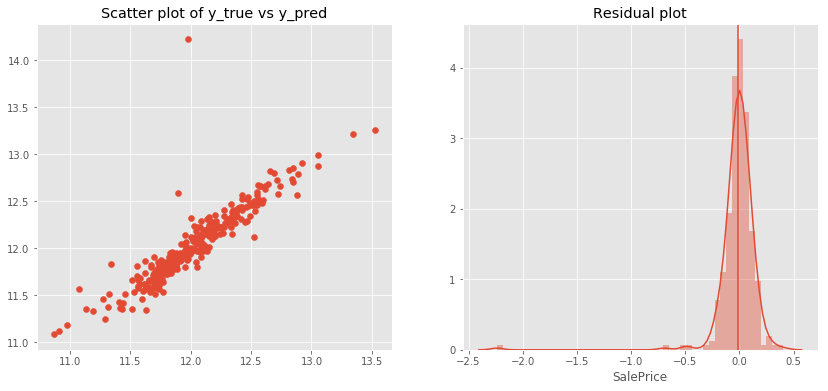

In [172]:
f = plt.figure(figsize= (14,6))

ax = f.add_subplot(121)
ax.scatter(y_valid, y_pred)
plt.title('Scatter plot of y_true vs y_pred')

residual = y_valid - y_pred
ax = f.add_subplot(122)
sns.distplot(residual, ax = ax)
plt.axvline(residual.mean())
plt.title('Residual plot');

In [173]:
#pred = reg.predict(new_test)
pred = np.expm1(final_pred/ kf.n_splits)
submit = pd.DataFrame({'Id':test_id,'SalePrice':pred})
submit.to_csv('houseprice.csv',index= False)
print('Shape: ',submit.shape)
submit.head()

Shape:  (1459, 2)


Id      SalePrice
0  1461  125017.204304
1  1462  164197.528824
2  1463  201047.906796
3  1464  204473.670725
4  1465  188019.328076

## 7.0 Model

In [174]:
from sklearn.model_selection import RandomizedSearchCV

param = {
    'n_estimators':[200, 500, 1000,2000],
    'learning_rate': np.linspace(0.001, 1, 10),
    'max_depth': [3,5,7,8,10],
    'num_leaves': [32, 64, 128],
    'feature_fraction': np.linspace(0.7,1,5),
    'bagging_fraction': np.linspace(0.6,1,5),
    'lambda_l1': np.linspace(0,1,20),
    'lambda_l2': np.linspace(0,1,20),
}

lgb_reg = lgb.LGBMRegressor(eval_metric ='mse',)
rsCV = RandomizedSearchCV(lgb_reg,cv= 5,param_distributions= param,random_state= seed)
rsCV.fit(X,y)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       eval_metric='mse', importance_type='split', learning_rate=0.1,
       max_depth=-1, min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
       objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=1.0, subsample_for_bin=200000,
       subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [200, 500, 1000, 2000], 'learning_rate': array([0.001, 0.112, 0.223, 0.334, 0.445, 0.556, 0.667, 0.778, 0.889,
       1.   ]), 'max_depth': [3, 5, 7, 8, 10], 'num_leaves': [32, 64, 128], 'feature_fraction': array([0.7  , 0.775, 0.85 , 0.925, 1.   ]), 'bagging_fra..., 0.52632, 0.57895, 0.63158, 0.68421,
       0.73684, 0.78947, 0.84211, 0.89474, 0.94737, 1.     ])},

In [175]:
rsCV.best_params_

{'num_leaves': 64,
 'n_estimators': 2000,
 'max_depth': 3,
 'learning_rate': 0.223,
 'lambda_l2': 0.3157894736842105,
 'lambda_l1': 0.7368421052631579,
 'feature_fraction': 1.0,
 'bagging_fraction': 0.8}

In [176]:
# Lightgbm
def model(X_train, X_valid, y_train, y_valid,test_new,random_seed, param):
    
    lg_param = {}
    lg_param['learning_rate'] = param['learning_rate']
    lg_param['n_estimators'] = param['n_estimators']
    lg_param['max_depth'] = param['max_depth']
    #lg_param['num_leaves'] = param['num_leaves']
    lg_param['boosting_type'] = 'gbdt'
    lg_param['feature_fraction'] = param['feature_fraction']
    lg_param['bagging_fraction'] = param['bagging_fraction']
    lg_param['lambda_l1'] = param['lambda_l1']
    lg_param['lambda_l2'] = param['lambda_l2']
    lg_param['silent'] = -1
    lg_param['verbose'] = -1
    lg_param['nthread'] = 4
    lg_param['seed'] = random_seed
    
    lgb_model = lgb.LGBMRegressor(**lg_param)
    print('-'*10,'*'*20,'-'*10)
    lgb_model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_valid,y_valid)], 
                 eval_metric ='mse', verbose =100, early_stopping_rounds=50)
    y_pred = lgb_model.predict(X_valid)
    y_pred_new = lgb_model.predict(test_new)
    return y_pred,y_pred_new,lgb_model

In [177]:
kf = KFold(n_splits=5, random_state=seed,)

final_pred = 0
rmse = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f'Modelling {i+1} of {kf.n_splits} fold')
    X_train, X_valid = X.loc[train_index], X.loc[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    # GBM Regression
    print('\n{} fold of {} KFold'.format(i+1,kf.n_splits))
    y_pred,y_pred_new,lgb_model = model(X_train, X_valid, y_train, y_valid,new_test,random_seed = i,
                                    param = rsCV.best_params_)
    final_pred += y_pred_new
    rmse.append(mean_squared_error(y_valid, y_pred)**0.5)
    #print('*'*10,'Rmse:',round(r2,3), '*'*10,'\n')

Modelling 1 of 5 fold

1 fold of 5 KFold
---------- ******************** ----------
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 0.00792471	training's l2: 0.00792471	valid_1's l2: 0.0185313	valid_1's l2: 0.0185313
Early stopping, best iteration is:
[109]	training's l2: 0.00760268	training's l2: 0.00760268	valid_1's l2: 0.0184812	valid_1's l2: 0.0184812
Modelling 2 of 5 fold

2 fold of 5 KFold
---------- ******************** ----------
Training until validation scores don't improve for 50 rounds.
[100]	training's l2: 0.00804699	training's l2: 0.00804699	valid_1's l2: 0.024857	valid_1's l2: 0.024857
[200]	training's l2: 0.00558952	training's l2: 0.00558952	valid_1's l2: 0.024491	valid_1's l2: 0.024491
Early stopping, best iteration is:
[239]	training's l2: 0.00530404	training's l2: 0.00530404	valid_1's l2: 0.0244468	valid_1's l2: 0.0244468
Modelling 3 of 5 fold

3 fold of 5 KFold
---------- ******************** ----------
Training until validation sc

In [178]:
print(rmse,'\nRMSE:',np.mean(rmse))

[0.13594542873091775, 0.1563548516266886, 0.13767012460418346, 0.12999552173768533, 0.13829700087404012] 
RMSE: 0.13965258551470305


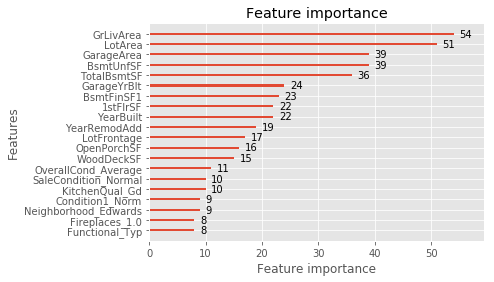

In [179]:
lgb.plot_importance(lgb_model,max_num_features=20)

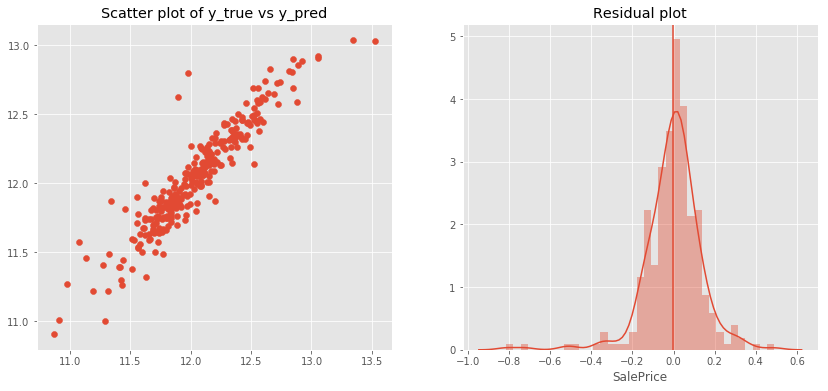

In [180]:
f = plt.figure(figsize= (14,6))

ax = f.add_subplot(121)
ax.scatter(y_valid, y_pred)
plt.title('Scatter plot of y_true vs y_pred')

residual = y_valid - y_pred
ax = f.add_subplot(122)
sns.distplot(residual, ax = ax)
plt.axvline(residual.mean())
plt.title('Residual plot');

In [181]:
#pred = reg.predict(new_test)
pred = np.expm1(final_pred/ kf.n_splits)
submit = pd.DataFrame({'Id':test_id,'SalePrice':pred})
submit.to_csv('houseprice_lgb.csv',index= False)
print('Shape: ',submit.shape)
submit.head()

Shape:  (1459, 2)


Id      SalePrice
0  1461  124493.023529
1  1462  153413.065252
2  1463  194639.034363
3  1464  196993.113045
4  1465  190908.474361